In [1]:
import string
import os
import nltk
import chardet   
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from collections import Counter
import pandas as pd

In [2]:
porter_stemmer = PorterStemmer()

In [3]:
def get_tokens(filename, stemmer=None):
    with open(filename,"r") as f:
        rawdata = f.read()
        text = str(rawdata.decode(chardet.detect(rawdata)['encoding']).lower())
    #remove the punctuation using the character deletion step of translate
    no_punctuation = text.translate(None, string.punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
#     filtered = tokens
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    if stemmer is not None:
        nonstem = len(filtered)
        filtered = map(lambda word: stemmer.stem(unicode(word)),filtered)
        if nonstem!= len(filtered):
            print "======================Stem functioned!==================="
    print "Org:", len(tokens)
    print "Non stops:", len(filtered)
    count = Counter(filtered)
    return dict(count)

get_tokens('Words-to-numbers.txt',porter_stemmer)

Org: 40
Non stops: 27


{u'abil': 1,
 u'agribusi': 1,
 u'chang': 1,
 u'compet': 1,
 u'competit': 1,
 u'depend': 1,
 u'evolv': 1,
 u'frequent': 1,
 u'heavili': 1,
 u'intens': 1,
 u'introduct': 1,
 u'jame': 1,
 u'need': 1,
 u'new': 1,
 u'oshawne': 1,
 u'product': 2,
 u'provid': 1,
 u'rapidli': 1,
 u'servic': 2,
 u'shift': 1,
 u'sincer': 1,
 u'subject': 1,
 u'success': 1,
 u'technolog': 1,
 u'user': 1}

In [4]:
def read_text(filename):
    with open(filename,"r") as f:
        rawdata = f.read()
        text = rawdata.decode(chardet.detect(rawdata)['encoding'])
    return text

In [5]:
MAP = {"good":1, "bad":-1}
results = {'label':[],'raw_text':[]}
for flag in MAP:
    files = os.listdir(os.path.join("GoodBad",flag))
    for f in files:
        results['label'].append(MAP[flag])
        results['raw_text'].append(read_text(os.path.join("GoodBad",flag,f)))

In [6]:
corpus = pd.DataFrame(results)

In [7]:
def tokenize(text, stemmer=None):
    #remove the punctuation using the character deletion step of translate
    no_punctuation = str(text.lower()).translate(None, string.punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    if stemmer is not None:
        nonstem = len(filtered)
        filtered = map(lambda word: stemmer.stem(unicode(word)),filtered)
        if nonstem!= len(filtered):
            print "======================Stem functioned!==================="
#     print "Org:", len(tokens)
#     print "Non stops:", len(filtered)
    return filtered

In [8]:
tfidf_convert = TfidfVectorizer(tokenizer=tokenize).fit(corpus['raw_text'])
count_convert = CountVectorizer(tokenizer=tokenize).fit(corpus['raw_text'])

In [9]:
tfidf = tfidf_convert.transform(corpus['raw_text'])
word_count = count_convert.transform(corpus['raw_text'])

In [10]:
tfidf.shape

(16, 2137)

In [11]:
word_count.shape

(16, 2137)

In [12]:
from sklearn.metrics.pairwise import pairwise_distances

In [13]:
word_count_mat = pairwise_distances(word_count,word_count,metric='cosine')
word_count_mat.argsort()

array([[ 0,  7, 11,  6,  5, 14, 12,  3,  2,  4, 13,  1,  9, 15, 10,  8],
       [ 1,  2, 13, 11,  5, 12,  0,  9,  4,  7, 10,  3, 15,  6, 14,  8],
       [ 2,  9, 13,  4, 12,  3, 10,  1, 11,  0,  6,  5,  7, 14,  8, 15],
       [ 3, 13,  2, 14,  4,  7,  0,  6,  9, 12, 15,  5,  1,  8, 11, 10],
       [ 4,  2, 13,  6, 14, 15,  3, 12, 11,  7,  0,  5,  8,  9,  1, 10],
       [ 5,  7,  6, 15,  0,  1, 14,  4,  2, 11,  3, 13, 12, 10,  9,  8],
       [ 6, 14, 15,  7,  5, 13,  4,  0, 12, 11,  3,  2,  8,  9,  1, 10],
       [ 7,  5,  6, 15, 14,  0,  3,  4, 11,  8,  2, 10, 12, 13,  1,  9],
       [ 8, 12,  7,  4,  6, 13,  3,  2, 14, 11, 15,  5,  9,  0, 10,  1],
       [ 9,  2, 12, 13, 10,  4,  3,  1,  0, 11,  7,  6,  5, 15, 14,  8],
       [10,  2,  9, 12, 14,  7, 13,  1,  4,  5,  6,  3, 11,  0, 15,  8],
       [11, 13,  0,  2,  6,  4, 14,  1, 12,  7, 15,  5,  9,  8,  3, 10],
       [12, 13,  2,  9,  6,  4,  0, 11,  1,  8, 10,  3,  7, 14, 15,  5],
       [13,  3,  2, 12,  4,  6, 11, 15, 14,  1,  9,

In [14]:
distance_mat = word_count_mat
print "Good-good distance:", distance_mat[:8,:8].sum() / 56
print "Good-bad distance:", distance_mat[8:,:8].mean()
print "Bad-good distance:", distance_mat[:8,8:].mean()
print "Bad-bad distance:", distance_mat[8:,8:].sum() / 56

Good-good distance: 0.859429335831
Good-bad distance: 0.869553658034
Bad-good distance: 0.869553658034
Bad-bad distance: 0.883246290411


In [15]:
tfidf_mat = pairwise_distances(tfidf,tfidf,metric='cosine')
tfidf_mat.argsort()

array([[ 0,  7,  5,  6, 14, 11, 12,  4,  3,  2,  9, 13,  1, 15, 10,  8],
       [ 1,  5,  2, 11, 10, 13, 15, 12,  7,  6,  4,  0, 14,  9,  3,  8],
       [ 2,  9,  4, 12,  3, 10,  1, 13,  5, 11,  7,  6, 14,  8,  0, 15],
       [ 3, 13, 14,  2,  4,  7,  6,  5,  9,  8,  0, 12, 15,  1, 10, 11],
       [ 4,  2,  6, 13, 15, 14,  3,  5,  7, 11,  8,  0, 12,  9,  1, 10],
       [ 5,  7,  6,  1, 15,  0, 14,  4,  2,  3, 11, 12, 13,  8,  9, 10],
       [ 6, 15, 14,  5,  7, 13,  4,  0, 12, 11,  8,  3,  2,  1,  9, 10],
       [ 7,  5,  6, 15,  0, 14,  8,  4,  3, 11,  2, 12,  1, 13, 10,  9],
       [ 8,  7, 12,  6,  4, 14,  3,  5, 13,  2, 15, 11,  9, 10,  0,  1],
       [ 9,  2, 12, 10,  3,  4, 13,  5,  0,  6,  7,  1, 11,  8, 15, 14],
       [10,  2,  9,  1, 14, 12,  5, 13,  7,  4,  3, 11,  6, 15,  0,  8],
       [11, 14,  6,  0,  4,  1,  7, 15,  2,  5, 13, 12,  8,  9, 10,  3],
       [12,  2, 13,  6,  9,  0,  8, 10,  7, 14,  1,  4,  5,  3, 15, 11],
       [13,  3,  6,  4, 15, 12, 14,  2,  1, 11,  9,

In [16]:
distance_mat = tfidf_mat
print "Good-good distance:", distance_mat[:8,:8].sum() / 56
print "Good-bad distance:", distance_mat[8:,:8].mean()
print "Bad-good distance:", distance_mat[:8,8:].mean()
print "Bad-bad distance:", distance_mat[8:,8:].sum() / 56

Good-good distance: 0.932577084579
Good-bad distance: 0.93953756659
Bad-good distance: 0.93953756659
Bad-bad distance: 0.947940534062


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
features = tfidf
nbrs = NearestNeighbors(n_neighbors=len(corpus)).fit(features)
distances, indices = nbrs.kneighbors(features)
res = []
for idx in range(len(corpus)):
    res.append((corpus['label'].values == corpus.ix[indices[:,idx]]['label'].values).mean())
    print idx, res[idx]

0 1.0
1 0.375
2 0.75
3 0.3125
4 0.4375
5 0.3125
6 0.5
7 0.6875
8 0.5
9 0.3125
10 0.5625
11 0.5
12 0.5625
13 0.4375
14 0.4375
15 0.3125


In [20]:
converter = tfidf_convert
sample_vec = converter.transform([read_text('Words-to-numbers.txt')])
print nbrs.kneighbors(sample_vec)[1]

[[ 3 13  4  0  8 14  2  9 15  5  6 12 11  7  1 10]]


<Container object of 15 artists>

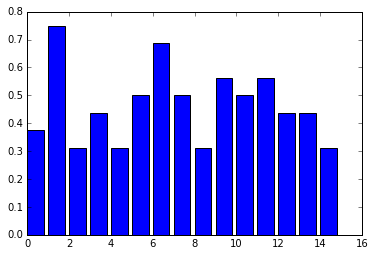

In [21]:
res = res[1:]
plt.bar(range(len(res)),res)

In [22]:
features = word_count
nbrs = NearestNeighbors(n_neighbors=len(corpus)).fit(features)
distances, indices = nbrs.kneighbors(features)
res = []
for idx in range(len(corpus)):
    res.append((corpus['label'].values == corpus.ix[indices[:,idx]]['label'].values).mean())
    print idx, res[idx]

0 1.0
1 0.375
2 0.4375
3 0.4375
4 0.375
5 0.625
6 0.5625
7 0.4375
8 0.625
9 0.375
10 0.375
11 0.375
12 0.5625
13 0.5
14 0.5
15 0.4375


In [23]:
converter = count_convert
sample_vec = converter.transform([read_text('Words-to-numbers.txt')])
print nbrs.kneighbors(sample_vec)[1]

[[ 1  8 11 12  3  2  5  9  6  0  4 10 15 13  7 14]]


<Container object of 15 artists>

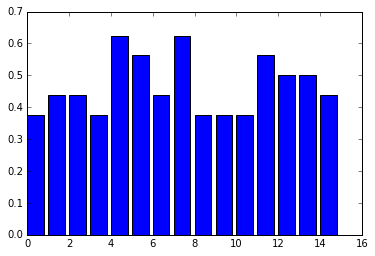

In [24]:
res = res[1:]
plt.bar(range(len(res)),res)

# Both poor performance due to naive algorithm and poor corpus, while it seems tfidf is still little bit better than word_count